# unidirectional data 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

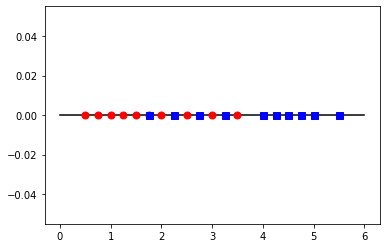

In [5]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

X0 = X[0][y == 0]
X1 = X[0][y == 1]

plt.plot([0, 6], [0, 0], 'black')
plt.plot(X0, np.zeros((len(X0))), 'ro', markersize=7)
plt.plot(X1, np.zeros((len(X1))), 'bs', markersize=7)
plt.show()

In [6]:
# extened data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X.shape

(2, 20)

In [9]:
print(X)

[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
  4.   4.25 4.5  4.75 5.   5.5 ]]


#### Some required function

In [7]:
def sigmoid(s):
  return 1/(1 + np.exp(-s))


def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
  w = [w_init]    
  it = 0
  N = X.shape[1]
  d = X.shape[0]
  count = 0
  check_w_after = 20
  while count < max_count:
    # mix data 
    mix_id = np.random.permutation(N)
    for i in mix_id:
      xi = X[:, i].reshape(d, 1)
      yi = y[i]
      zi = sigmoid(np.dot(w[-1].T, xi))
      w_new = w[-1] + eta*(yi - zi)*xi
      count += 1
      # stopping criteria
      if count%check_w_after == 0:                
        if np.linalg.norm(w_new - w[-check_w_after]) < tol:
          return w
      w.append(w_new)
  return w


eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


#### Visualize

In [10]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


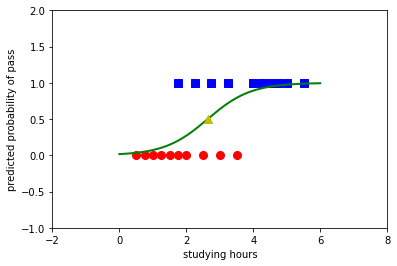

In [11]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.savefig('lg_results.png', bbox_inches='tight', dpi = 300)
plt.show()

# bidirectional data

In [33]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

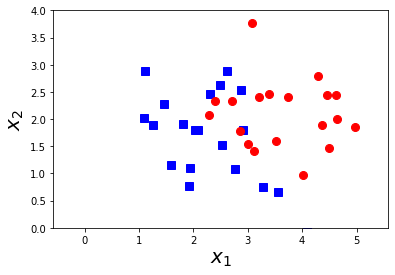

In [34]:
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

In [35]:
X = np.concatenate((X0, X1), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

print(X.shape)
print(X)

(3, 40)
[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]
 [ 1.92306918  2.90509186  1.58909188  2.76874122  2.52416203  2.02414192
   2.49174878  1.11439322  2.62561276  3.27183166  3.55617919  1.45945603
   2.87575608  2.30375703  1.08925412  4.09096119  1.80350003  1.25827634
   2.08532169  1.9340609   4.49775285  3.07311718  3.52528933  2.39091046
   3.12302646  4.62359547  3.38696098  4.36167918  3.21261415  2.71754956
   4.01073111  3.11892586  2.29402636  3.7365999   4.29699439  4.63617269
   2.84870815  4.45368062  4.97052399  3.01324102]
 [ 0.775673    1.7997662   1.16143907  1.07663514 

In [36]:
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
print(w[-1])

[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


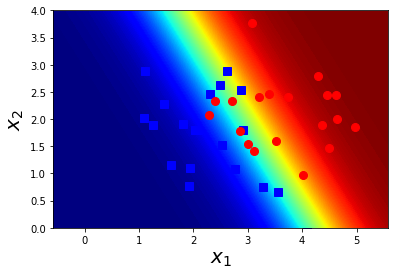

In [37]:
# Make data.
xm = np.arange(-1, 6, 0.025)
xlen = len(xm)
ym = np.arange(0, 4, 0.025)
ylen = len(ym)
xm, ym = np.meshgrid(xm, ym)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
zm = sigmoid(w0 + w1*xm + w2*ym)

CS = plt.contourf(xm, ym, zm, 200, cmap='jet')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()